In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

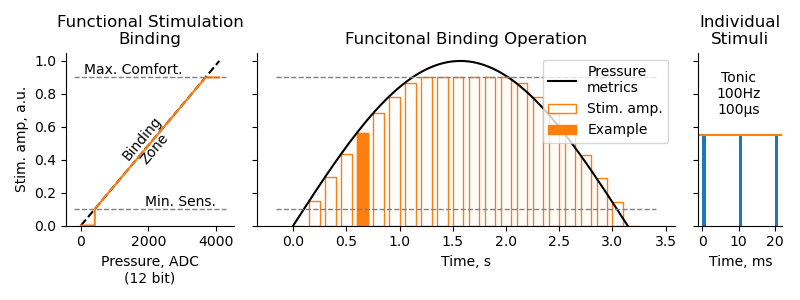

In [135]:
times = np.arange(0, np.pi, 1e-3);
freq = 1;
softcap = 0.1
hardcap = 0.9

times_regions = np.arange(0, 3.3, 150e-3)
region_amps = np.sin(times_regions/freq)
region_amps[region_amps<softcap] = 0
region_amps[region_amps>hardcap] = hardcap


fig, axx = plt.subplots(1,3, gridspec_kw={'width_ratios': (2,5,1)}, figsize=(8, 3), sharey=True)

plt.sca(axx[0])

pressures = np.arange(0, 4096)
stims = pressures.copy() / 4096
stims[stims<softcap] = 0
stims[stims>hardcap] = hardcap
plt.plot(pressures, pressures/4096,'--k')
plt.plot(pressures, stims, color='C1')
plt.xlabel("Pressure, ADC\n(12 bit)")
plt.hlines([softcap, hardcap], *plt.xlim(), color='gray', ls='--', lw=1)
plt.ylabel('Stim. amp, a.u.')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Functional Stimulation\nBinding')
plt.ylim(0, 1.05)
plt.text(100, 0.9, 'Max. Comfort.', ha='left', va='bottom')
plt.text(4000, 0.1, 'Min. Sens.', ha='right', va='bottom')
plt.text(2000, 0.5, 'Binding\nZone', ha='center', va='center', rotation=50)


plt.sca(axx[1])
plt.plot(times, np.sin(times/freq), 'k', label='Pressure\nmetrics')

plt.bar(times_regions, region_amps, align='edge', width=150e-3*2/3, label='Stim. amp.', edgecolor='C1', color='None')
plt.bar(times_regions[[4]], region_amps[[4]], align='edge', width=150e-3*2/3, label='Example', edgecolor='C1', color='C1')

plt.hlines([softcap, hardcap], *plt.xlim(), color='gray', ls='--', lw=1)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim(0, 1.05)
plt.title('Funcitonal Binding Operation')


plt.legend(loc='upper right')
plt.xlabel('Time, s')

# plt.grid(True)

plt.sca(axx[2])
plt.axhline(0.55, color='C1')
plt.bar([0,10,20], height=0.55, width=1, align='edge', color='C0', label='Stimuli')
plt.xticks([0,10,20])
plt.xlabel('Time, ms')
# plt.legend()
plt.title('Individual\nStimuli')
plt.text(10, 0.8, 'Tonic\n100Hz\n100µs', ha='center', va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
